# Изучение и анализ рынка российского кинопроката

В нашем распоряжении - открытые данные, опубликованные Министерством культуры РФ. Цель исследования - изучить рынок отечественного проката и выявить текущие тренды. Особое внимание будет уделено фильмам, получавшим государственную поддержку.

Описание данных:
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.
Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

Импортируем библиотеки и прочитаем файлы.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

try:
    mkrf_movies = pd.read_csv('/home/aart/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/home/aart/datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [2]:
display(mkrf_movies.describe().T, mkrf_movies.info(), mkrf_movies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.0,15000000.0,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,30000000.0,40375000.0,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,68649916.0,141985319.5,2.305074e+09


None

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
display(mkrf_shows.describe().T, mkrf_shows.info(), mkrf_shows.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,count,mean,std,min,25%,50%,75%,max
puNumber,3158.0,1.201875e+08,1.238394e+07,111000113.0,1.130002e+08,1.210131e+08,1.210283e+08,2.240264e+08
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,8.623900e+04,2.327988e+06,2.397967e+07,3.073569e+09


None

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


## Предобработка данных

### Типы данных и объединение датафреймов

In [4]:
mkrf_movies.convert_dtypes()
mkrf_shows.convert_dtypes()
display(mkrf_movies.info(), mkrf_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

None

Я бы хотел объединить два этих датафрейма в один, используя столбец `puNumber`. Автоматическая конверсия типов данных `convert_dtypes` решила, что в таблице `mkrf_movies` столбец `pu_number` должен сохранить тип данных `object`. Это подсказывает нам, что в этом столбце присутствуют нечисловые значения.

In [5]:
mkrf_movies.query('puNumber.str.contains("\D")')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Если проблема со строкой `1791` понятна сразу, то строка `804` вызывает недоумение.

In [6]:
mkrf_movies.puNumber.value_counts().sort_index()

 111004112    1
111000110     1
111000111     1
111000112     1
111000113     1
             ..
226017410     1
226019110     1
231001012     1
231001111     1
нет           1
Name: puNumber, Length: 7484, dtype: int64

Теперь все стало понятнее.

In [7]:
#Удалим все возможные пробелы в столбце, на всякий случай
mkrf_movies.puNumber = mkrf_movies.puNumber.str.replace(' ', '')

Что касается фильма на строке `1797` - 

In [8]:
mkrf_movies[mkrf_movies.title.str.contains('Курбан-роман')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Отличается лишь дата премьеры. Для исследования нам наиболее необходим год, который совпадает. Будем расценивать это как дубликат, и удалим проблемную строку.

In [9]:
mkrf_movies = mkrf_movies.loc[mkrf_movies.puNumber != 'нет']

In [10]:
#Проверяем сколько осталось нечисловых значений
mkrf_movies.query('puNumber.str.contains("\D")').shape[0]

0

Осталось лишь преобразовать тип данных и объединить датафреймы. В этом случае с задачей справится простой `merge`.

In [11]:
mkrf_movies.puNumber = mkrf_movies.puNumber.astype(int)

df = pd.merge(mkrf_movies,
              mkrf_shows,
              on='puNumber',
              how='left')

In [12]:
display(df.sample(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2314,Обратная сторона брака,121015414,2014-07-21T12:00:00.000Z,Художественный,"Баладжи Моушн Пикчерз, Притиш Нанди Коммьюнике...",Индия,Сакет Чаудхари,"Шобха Капур, Экта Капур, Притиш Нанди",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


None

Код работает как ожидалось.

### Дальнейшее преобразование типов данных и пр.

Инцидент с пробелом не внушает доверия к структурной целостности датафрейма.

In [13]:
df.columns = df.columns.str.lower() #нижний регистр
df.columns = df.columns.str.replace(' ', '_') #замена пробелов на ниж. прочерк

Дату премьеры необходимо перевести в `datetime`.

In [14]:
df.show_start_date = df.show_start_date.astype('datetime64[D]')

Еще один неожиданный тип данных - `object` в стоблце `ratings`. Как мы видели раннее, значения в этом столбце представляют собой число с плавающей точкой в пределах от 0 до 10:

In [15]:
df.ratings.head(3)

0    7.2
1    6.6
2    6.8
Name: ratings, dtype: object

Скорее всего, здесь тоже присутсвуют нечисловые значения.

In [16]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Действительно, видим оценки в процентах.

In [17]:
df.query('ratings.str.contains("%") == True')[['title','ratings','show_start_date']].sample(3)

,title,ratings,show_start_date
2679,Год Белого Слона,79%,2015-04-08
7158,Анна Каренина. Интимный дневник,79%,2019-10-23
3785,Охотники,89%,2016-02-06


[Проверка](https://www.kinopoisk.ru/film/742185/?utm_referrer=www.google.com) показала, что фильмы с рейтингом в формате процентов на сайте "Кинопоиска" не имеют традиционного рейтинга. Данные фильмы либо не набрали необходимого минимума количества голосов для рассчета рейтинга, либо еще не вышли в прокат (рейтинг отображает долю проголосовавших зрителей, ожидающих выхода фильма).
Можно бы было перевести проценты в числа с плавающей точкой (99% = 9.9, etc.), но в свете сказанного выше (т.е. малой выборки и нерепрезентативности таких оценок, мне кажется более правильным замена таких значений на `nan`.

In [18]:
df.loc[(df.ratings.str.contains('%'))&(df.ratings.notna()), 'ratings'] = np.NaN
df.ratings = df.ratings.astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   punumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Эта часть предобработки данных завершена.

###  Обработка пропусков

In [20]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Пропусков', 'Доля пропусков'])
missing_data.head(15)

,Пропусков,Доля пропусков
refundable_support,7153,0.955645
nonrefundable_support,7153,0.955645
budget,7153,0.955645
financing_source,7153,0.955645
box_office,4327,0.578090
ratings,995,0.132933
genres,975,0.130261
producer,568,0.075885
film_studio,18,0.002405
director,9,0.001202


* `refundable_support`, `nonrefundable_support`, `financing_source`, - Почти на 96% эти поля состоят из пропусков, которые можно трактовать как отсутствие господдержки. Следовательно, пропуски в этих полях можно заполнить нулями, а для support_source можно указать "без господдержки".
* `box_office` - Больше половины значений данных о кассовых сборах содержат пропуски. Заполнять их расчетными данными без крайней необходимости не стоит. Можно попробовать частично восстановить пропуски вручную, но необходимо понимать, что это большое количество ручного труда, неизвестно, все ли данные лежат в открытом доступе, неизвестно, если временной период по сборам в открытом доступе будет тем же самым, что в датафрейме, и, наконец, если сборы будут указаны в валюте, необходимо будет учитывать тогдашний курс, инфляцию и т.д. В свете всего этого заполнение пропусков здесь возможным не представляется.
* `budget` - см. выше
* `ratings` - об этом столбце уже было сказано. Если здесь встречается пропуск - фильм не набрал достаточное количество голосов на платформе Кинопоиска.
* `genres`, `producer` - данные есть в открытом доступе, но перспектива заполнять вручную 1500 пропусков кажется нецелесообразной.
* `film_studio`, `director` - заполнить вручную кажется возможным. Оценим целесообразность этого дальше, пока же заменим пропуски на "не указано". 
* `production_country` - заполним вручную.

* `production_country`:

In [21]:
df[df['production_country'].isna()]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [22]:
df.loc[df['punumber']==111001216, 'production_country'] = "СССР, Россия"
df.loc[df['punumber']==214000410, 'production_country'] = "Россия"

* `film_studio`, `director`: 

In [23]:
df.director = df.director.fillna('не указано')
df.film_studio = df.film_studio.fillna('не указано')

* `refundable_support`, `nonrefundable_support`, `financing_source`:

In [24]:
fill_list = ['refundable_support', 'nonrefundable_support']
df[fill_list] = df[fill_list].fillna(0)

df.financing_source = df.financing_source.fillna('без господдержки')

In [25]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Пропусков', 'Доля пропусков'])
missing_data.head(15)

,Пропусков,Доля пропусков
budget,7153,0.955645
box_office,4327,0.578090
ratings,995,0.132933
genres,975,0.130261
producer,568,0.075885
title,0,0.000000
punumber,0,0.000000
show_start_date,0,0.000000
type,0,0.000000
film_studio,0,0.000000


### Обработка дубликатов

Для начала, как и раннее:

In [26]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        df[df.columns[i]] = df[df.columns[i]].str.lower()            #нижний регистр
        df[df.columns[i]] = df[df.columns[i]].str.replace('ё','е')   #ё->е, урок из предыдущего проекта
        df[df.columns[i]] = df[df.columns[i]].str.strip()            #пробелы

In [27]:
print(f'Количество явных дубликатов: {df.duplicated().sum()}')

Количество явных дубликатов: 0


Поищем неявные дубликаты:
* Дубликаты по номерам прокатного удостоверения:

In [28]:
print(f'Совпадающих прокатных удостоверений: {df["punumber"].duplicated().sum()}')

Совпадающих прокатных удостоверений: 2


In [29]:
df[df[['punumber']].duplicated(keep=False)]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,как жениться и остаться холостым,221154310,2010-12-17,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.0,"мелодрама,комедия",NaN
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.6,"драма,мелодрама,история",NaN
5066,анализируй это!,221054410,2010-05-25,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.4,"комедия,криминал",NaN
5067,анализируй то!,221054410,2010-05-25,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,без господдержки,6.8,"комедия,криминал",NaN


Позиции `4637` и `4638` делят одно и то же прокатное удостоверение, чего быть не должно. Посмотрим на фильм с позиции `4637` поближе:

In [30]:
df.query('title=="как жениться и остаться холостым"')

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,как жениться и остаться холостым,221142510,2010-12-03,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.0,"мелодрама,комедия",NaN
4637,как жениться и остаться холостым,221154310,2010-12-17,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.0,"мелодрама,комедия",NaN


Видим дубликат. Следовательно, одна из позиций ошибочна.
На сайте Министерства культуры находим интересующие фильмы и их прокатные удостоверения:

* ["Как жениться и остаться холостым"](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/557867/) – 121002007
* ["Иоанна - женщина на папском престоле"](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522107/) – 221154310

То есть, ни одно прокатное удостоверение для фильма не является верным. Исправим - удалим одну позицию и исправим оставшуюся.

In [31]:
df = df.loc[~((df.title=='как жениться и остаться холостым') & (df.punumber==221154310))]
df.loc[df.punumber[4519]]=121002007
df.query('title=="как жениться и остаться холостым"')

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4519,как жениться и остаться холостым,221142510,2010-12-03 00:00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,7.0,"мелодрама,комедия",NaN


С позициями `5066` и `5067` ситуация иная. 
* ["Анализируй это!"](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/527875/) - 221054410
* ["Анализируй то!"](https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/527875/) - 221054410

У фильмов действительно один и тот же номер прокатного удостоверения. Объяснить это иначе чем человеческая ошибка я не могу. Видимо, кто-то подумал что это один и тот же фильм. Исправлять ничего не будем, но запомним.

* Дубликаты по связке "название+режиссер":

Разные фильмы могут иметь одно и то же название, поэтому будем проводить поиск дубликатов по двум параметрам сразу. Как обычно, для начала:

In [32]:
df.title = df.title.str.replace('.', ' ') 
df.title = df.title.str.replace('_', ' ')
df.title = df.title.str.replace('  ', ' ') #точки, нижние подчеркивания, двойные пробелы -> пробел
df.title = df.title.str.strip()
df[['title','director']].duplicated().sum()

718

Страшное количество дубликатов - 718. Успокаивает то, что скорее всего это связано с несколькими номерами прокатных удостоверений у одного и того же фильма (что [нормально](https://culture.gov.ru/press/news/poyasneniya-minkultury-rossii-po-voprosu-pravoprim/)).

In [33]:
df.drop(['punumber','show_start_date','box_office'], axis=1).duplicated().sum()

675

675 из 718 позиций с одинаковыми названиями отличаются номеров прокатоного удостоверения, и/или датой премьеры, и/или сборами. Логичный шаг: объединить записи с повторяющимися названиями. Сливать данные будем след. образом:

* show_start_date: наиболее раняя;
* box_office: суммирование всех сборов;
* refundable_support, non_refundable_support, budget: максимум из всех записей;
* ratings: среднее значение;
* financing_source, film_studio, producer, genres: объединение неповторяющихся значений;
* оставшиеся поля: будут взяты из записи, определяемой отсортированным по возрастанию полем show_start_date.

Для примера будем использовать фильм "Химера"

In [34]:
df.query('title == "химера"')

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4005,химера,121010510,2010-06-07 00:00:00,художественный,"гомон, коперхет интертейнмент, дак кастл интер...",сша-франция-канада,винченцо натали,стивен хобан,«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,5.7,"ужасы,фантастика,драма",NaN
4353,химера,221070910,2010-06-21 00:00:00,художественный,"гомон, коперхет интертейнмент, дак кастл интер...",сша-франция-канада,винченцо натали,стивен хобан,«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,5.7,"ужасы,фантастика,драма",NaN
4597,химера,221159310,2010-12-17 00:00:00,художественный,"гомон, коперхет интертейнмент, дак кастл интер...",сша-франция-канада,винченцо натали,стивен хобан,«16+» - для детей старше 16 лет,0.0,0.0,NaN,без господдержки,5.7,"ужасы,фантастика,драма",NaN
6599,химера,121032118,2019-01-10 00:00:00,художественный,"вандеринг бард, сомниа продакшнз",сша,митци пейроне,"ариэль элвис, логан стейнхардт, али дзазаери",«18+» - запрещено для детей,0.0,0.0,NaN,без господдержки,5.7,"ужасы,фантастика,драма",5054311.03


In [35]:
df = (df
      .groupby(['title','director'])
      .agg({'show_start_date': min,
            'box_office': sum,
            'budget': max,
            'refundable_support': max,
            'nonrefundable_support': max,
            'financing_source': set,
            'ratings': 'mean',
            'film_studio': set,
            'punumber': 'first',
            'type': 'first',
            'production_country': 'first',
            'producer': set,
            'age_restriction': 'first',
            'genres': set,})
        .reset_index())

#возвращаем nan
df.loc[df.box_office == 0, 'box_office'] = np.NaN
df.loc[df.budget == 0, 'budget'] = np.NaN

In [36]:
df.query('title == "химера"')

,title,director,show_start_date,box_office,budget,refundable_support,nonrefundable_support,financing_source,ratings,film_studio,punumber,type,production_country,producer,age_restriction,genres
6285,химера,винченцо натали,2010-06-07,NaN,NaN,0.0,0.0,{без господдержки},5.7,"{гомон, коперхет интертейнмент, дак кастл инте...",121010510,художественный,сша-франция-канада,{стивен хобан},«16+» - для детей старше 16 лет,"{ужасы,фантастика,драма}"
6286,химера,митци пейроне,2019-01-10,5054311.03,NaN,0.0,0.0,{без господдержки},5.7,"{вандеринг бард, сомниа продакшнз}",121032118,художественный,сша,"{ариэль элвис, логан стейнхардт, али дзазаери}",«18+» - запрещено для детей,"{ужасы,фантастика,драма}"


Работает как ожидалось. Посмотрим еще раз на таблицу с пропусками.

In [37]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Пропусков', 'Доля пропусков'])
missing_data.head(15)

,Пропусков,Доля пропусков
budget,6451,0.953444
box_office,3665,0.541679
ratings,986,0.145729
title,0,0.000000
director,0,0.000000
show_start_date,0,0.000000
refundable_support,0,0.000000
nonrefundable_support,0,0.000000
financing_source,0,0.000000
film_studio,0,0.000000


## Проблемы категориальных значений

Значения большей части категориальных значений - наборы строк с разделителем.

In [38]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        display(df[df.columns[i]].value_counts().to_frame().reset_index().sample(1))

,index,title
6587,история одного назначения,1


,index,director
4539,сторм эшвуд,1


,index,financing_source
5,"{министерство культуры, фонд кино, без господд...",1


,index,film_studio
2562,{пайн хаус филм},1


,index,type
3,документальный,276


,index,production_country
895,сша - великобритания - чехия,1


,index,producer
3268,"{марти бауэн, дэмьен шазелл}",1


,index,age_restriction
2,«18+» - запрещено для детей,1431


,index,genres
300,"{драма,комедия,спорт}",3


Чтобы удобно работать с такими значениями - нужно провести огромное количество работы по их обработке. Может потребоваться множество отдельных вспомогательных таблиц. К счастью для задач нашего исследования такая обработка не требуется, но в очередной раз стоит отметить, что качество данных в казалось бы официальном источнике весьма низкое.

## Обработка выбросов

Кэпнем данные.

In [39]:
df_numerical = df[['box_office','budget']]

min_limit=pd.Series()
max_limit=pd.Series()

for column in df_numerical.columns:
    #Q1 и Q2 (10 и 90 процентили соотв.)
    q1 = df_numerical[column].quantile(0.15)
    q2 = df_numerical[column].quantile(0.95)
    #интерквантильный размах
    iqr = q2 - q1
    #рассчитываем пределы
    max_limit[column] = q2 + (1.5 * iqr)
    min_limit[column] = q1 - (1.5 * iqr)
    
for column in df_numerical.columns:
    df_numerical[column] = df_numerical[column].clip(min_limit[column],max_limit[column])

## Добавление интересующих нас данных 

In [40]:
df['premiere_year'] = df.show_start_date.dt.year.astype(int) #год премьеры
df['director_main'] = df.director.str.split(',').str[0] #главный режиссер
df['genre_main'] = (df                                  #главный жанр
                    .genres
                    .apply(repr)            
                    .str.replace('{','')
                    .str.replace('}','')
                    .str.replace('\'','')
                    .str.replace('\"','')
                    .str.replace('nan','')
                    .str.split(',')
                    .str[0])
df['govsupport_share'] = ((df.refundable_support+df.nonrefundable_support)/df.budget) #доля господдержки


df_numerical.box_office = df_numerical.box_office / 1E6
df_numerical.budget = df_numerical.budget / 1E6
df.refundable_support = df.refundable_support / 1E6
df.nonrefundable_support =  df.nonrefundable_support / 1E6

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы создал верно, использовал подходящие методы.

## Исследовательский анализ

### Cборы

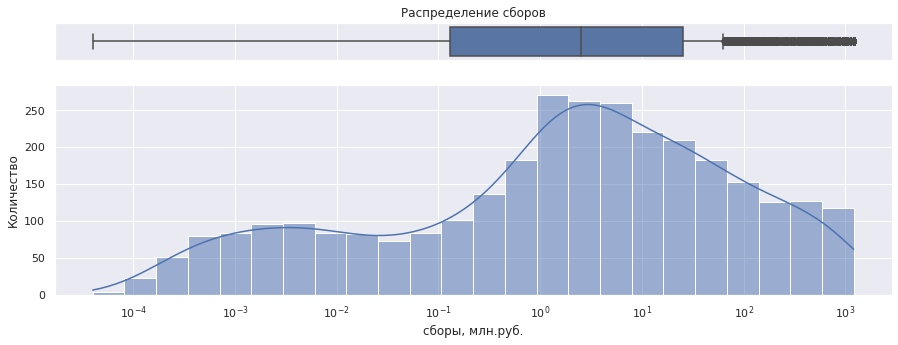

In [41]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))
 
sns.boxplot(df_numerical.box_office, ax=ax_box)
sns.histplot(x=df_numerical.box_office, 
             log_scale=True,
             kde=True,) 

ax_box.set(xlabel='', title='Распределение сборов')
ax_hist.set(xlabel='сборы, млн.руб.',
           ylabel='Количество')

plt.show()

Наблюдаем бимодальное распределение на лог. шкале. Первая группа фильмов - со сборами от 100 до 100000 руб. Видимо, это очень нишевые картины, бывшие только в ограниченном прокате. Остальные фильмы - с более массовыми показами, и следовательно сборами.

### Бюджет

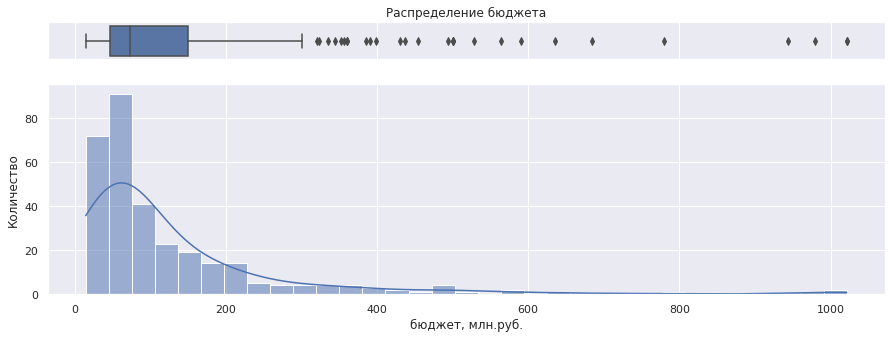

In [42]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))
 
sns.boxplot(df_numerical.budget, ax=ax_box)
sns.histplot(x=df_numerical.budget,
             log_scale=False,
             kde=True,) 

ax_box.set(xlabel='', title='Распределение бюджета')
ax_hist.set(xlabel='бюджет, млн.руб.',
           ylabel='Количество')

plt.show()

Классическое распределение Пуассона, можно отметить лишь очень длинный хвост.

### Господдержка

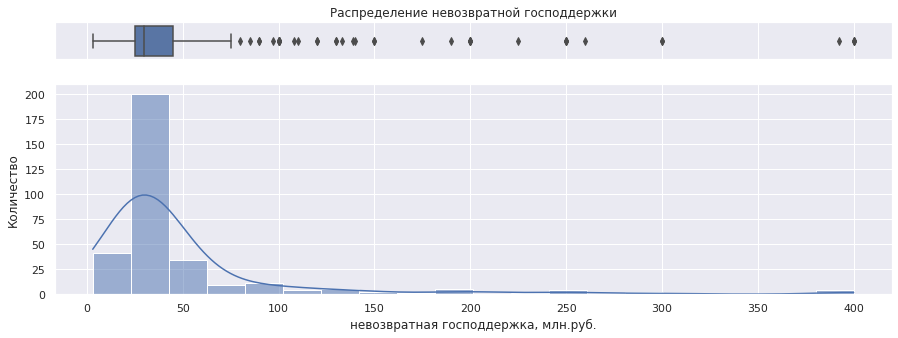

In [43]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))
 
sns.boxplot(df.query('nonrefundable_support>0').nonrefundable_support, ax=ax_box)
sns.histplot(x=df.query('nonrefundable_support>0').nonrefundable_support,
             bins=20,
             log_scale=False,
             kde=True,) 

ax_box.set(xlabel='', title='Распределение невозвратной господдержки')
ax_hist.set(xlabel='невозвратная господдержка, млн.руб.',
           ylabel='Количество')

plt.show()

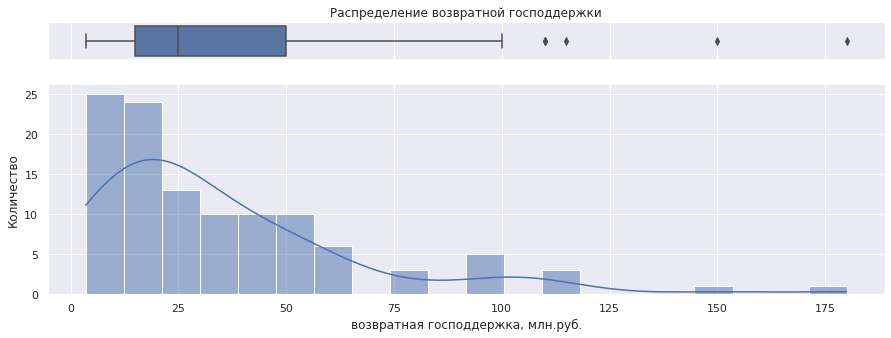

In [44]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))
 
sns.boxplot(df.query('refundable_support>0').refundable_support, ax=ax_box)
sns.histplot(x=df.query('refundable_support>0').refundable_support,
             bins=20,
             log_scale=False,
             kde=True,) 

ax_box.set(xlabel='', title='Распределение возвратной господдержки')
ax_hist.set(xlabel='возвратная господдержка, млн.руб.',
           ylabel='Количество')

plt.show()

Распределения пуассоновы, с длинными хвостами вправо. Изучим их отношения позже.

### Рейтинги

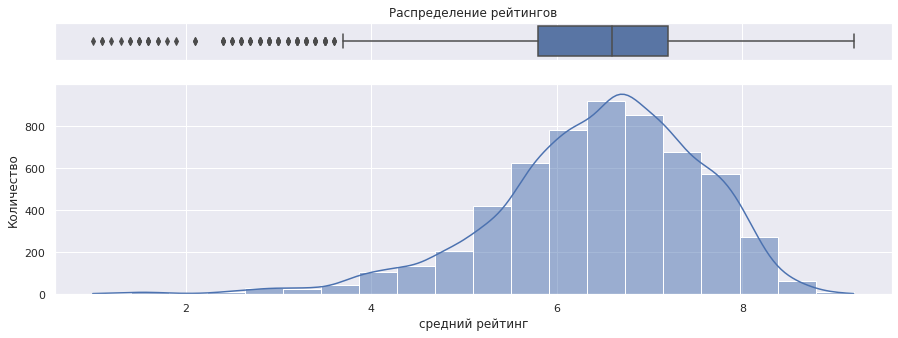

In [45]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))
 
sns.boxplot(df.ratings, ax=ax_box)
sns.histplot(x=df.ratings, 
             bins=20,
             log_scale=False,
             kde=True,) 

ax_box.set(xlabel='', title='Распределение рейтингов')
ax_hist.set(xlabel='средний рейтинг',
           ylabel='Количество')

plt.show()

Распределение нормальное, с более длинным хвостом влево.

### Количество премьер в год

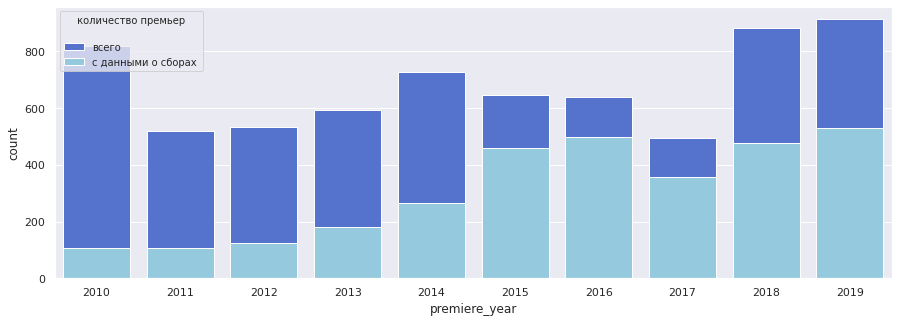

In [46]:
fig, ax = plt.subplots(figsize=(15,5));

sns.countplot(x=df.premiere_year, color='royalblue')
sns.countplot(x=df.query('box_office>0').premiere_year, color='skyblue')

ax.legend(['всего', 'с данными о сборах '], title=' количество премьер \n', loc='upper left', fontsize=10, title_fontsize=10);

Общее количество премьер в 2015-2017 годах шло на спад, затем тенденция к росту вернулась.
Доля фильмов с данными о прокате постоянно растет, лишь в в конце периода отмечается ее снижение. Возможная причина: снижение популярности кинотеатров и рост доли фильмов, не использующих традиционный прокат.
В 2015 году виден резкий рост доли фильмов с данными о прокате. 2015-2017 гг. - самые лучшие в данном показателе. К сожалению, в 2018-2019 гг. снова наблюдается падение.

### Сборы по годам 

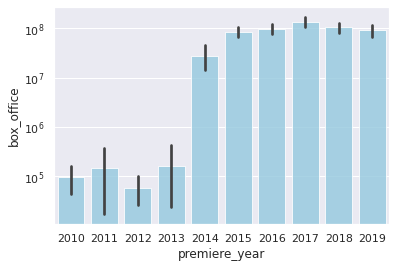

In [47]:
sns.barplot(data=df,
            x='premiere_year',
            y='box_office',
            color='skyblue',
            alpha=0.8,
            log=True,);

2010–2014 годах суммы сборов были относительно небольшими. Вероятно, данные за эти годы являются неполными, о чем говорит и большая погрешность.
Начиная с конца 2014 года ситуация изменилась: прокатные сборы резко пошли в рост и в дальнейшем, 2016–2019 годы, оставались стабильными.
Наибольшие сборы были в 2018 году.
Наиболее слабый – 2012 год.

Средние и медианные по сборам за каждый год:

In [48]:
df.pivot_table(index='premiere_year', values='box_office', aggfunc=['mean','median']).T

,premiere_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
mean,box_office,98397.27619,145525.981132,59631.048,164982.542541,2.798871e+07,8.586419e+07,9.629543e+07,1.364078e+08,1.045651e+08,9.136926e+07
median,box_office,2300.00000,3042.500000,6220.000,3580.000000,2.375250e+04,5.104961e+06,4.746948e+06,1.017783e+07,8.891102e+06,4.627798e+06


Медианные значения гораздо меньше средних, но динамика у них одинаковая.

### Влияние возрастного ограничения на сборы

In [49]:
df.value_counts('age_restriction')

age_restriction
«16+» - для детей старше 16 лет           2509
«12+» - для детей старше 12 лет           1485
«18+» - запрещено для детей               1431
«0+» - для любой зрительской аудитории     737
«6+» - для детей старше 6 лет              604
dtype: int64

In [50]:
#Заменим значения для удобной сортировки
df.age_restriction = df.age_restriction.replace(list(df.age_restriction.unique()), ['C_12+','D_16+','B_6+','A_0+','E_18+'])
df.value_counts('age_restriction')

age_restriction
D_16+    2509
C_12+    1485
E_18+    1431
A_0+      737
B_6+      604
dtype: int64

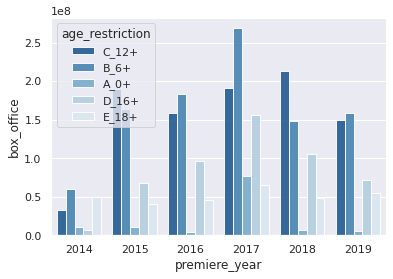

In [51]:
sns.barplot(data=df.query('premiere_year>=2014'), #данных за годы раньше почти нет
            x='premiere_year',
            y='box_office',
            hue='age_restriction',
            palette='Blues_r',
            alpha=0.9,
            ci=None);

In [52]:
df.pivot_table(index='age_restriction', columns='premiere_year', values='box_office', aggfunc=sum)

premiere_year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
age_restriction,,,,,,,,,,
A_0+,2390813.0,13805640.0,2763501.0,2710422.5,3.756432e+08,3.790547e+08,1.488417e+08,2.295989e+08,3.244900e+07,1.774607e+07
B_6+,NaN,450.0,1143410.0,359752.0,1.730617e+09,8.701800e+09,1.205314e+10,1.208614e+10,1.010497e+10,1.285255e+10
C_12+,5171658.0,219891.0,108734.0,20910336.5,2.584782e+09,1.361608e+10,1.219940e+10,7.851428e+09,1.426729e+10,1.268020e+10
D_16+,2714858.0,1398733.0,3254426.0,678289.6,5.442416e+08,1.136828e+10,1.666352e+10,1.874252e+10,1.650360e+10,1.275342e+10
E_18+,54385.0,1040.0,183810.0,5203039.6,2.209713e+09,5.432310e+09,6.793923e+09,9.651496e+09,8.760086e+09,1.012180e+10


За период с 2014 по 2019 год наибольшая сумма прокатных сборов в возрастной категории "16+". Эта категория была самой популярной на протяжении большей части исследуемого периода.
Сборы в категории "0+" мизерны на фоне других категорий и к концу исследуемого периода падают до едва различимых.
Зависимость сборов от возрастной категории:
* 0: сборы исчезающе малы по сравнению с другими категорями и с течением времени тенденция усиливается;
* 16+: была наиболее популярна в 2016-2018 годы, но, возможно, эта тенденция закончилась;
* 18+: как правило, отстает от других категорий (не считая 0+), но с течением времени отставание сокращается.

Возможные причины выявленных тенденций:
* необходимо искать в правилах присвоения рейтинга (возможно, они слишком строгие или невыгодные для заявителя)
* потребности зрителя изменились



### Анализ фильмов с господдержкой

In [53]:
df['support_total'] = df.refundable_support + df.nonrefundable_support

<AxesSubplot:xlabel='premiere_year', ylabel='support_total'>

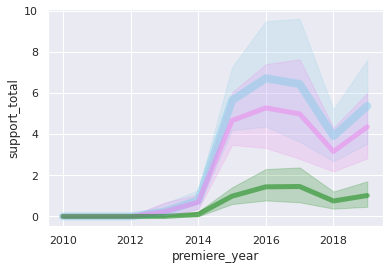

In [54]:
sns.lineplot(x=df.premiere_year,
             y=df.support_total,
             color='skyblue',
             linewidth=8,
             alpha=0.5)

sns.lineplot(x=df.premiere_year,
             y=df.nonrefundable_support,
             color='violet',
             linewidth=5,
             alpha=0.5)

sns.lineplot(x=df.premiere_year,
             y=df.refundable_support,
             color='green',
             linewidth=5,
             alpha=0.5)


In [55]:
df.pivot_table(index='premiere_year', values=['refundable_support' ,'nonrefundable_support'])

,nonrefundable_support,refundable_support
premiere_year,,
2010,0.000000,0.000000
2011,0.000000,0.000000
2012,0.000000,0.000000
2013,0.226175,0.000000
2014,0.689137,0.097662
2015,4.666288,0.984781
2016,5.283837,1.439844
2017,4.989119,1.456168
2018,3.161146,0.751419


Согласно входным данным, в 2010-2012 господдержка не оказывалась.
Далее сумма господдержки быстро нарастает и, начиная с 2015 года, выходит на относительно стабильный уровень.
Интересно, что график общих кассовых сборов имеет резкий рост в те же годы, что и график госпомощи. Возможно, это связано с третьим фактором: например, данные о сборах в прокате стали собирать более полно.
Объем невозвратной госпомощи примерно в 4 раза превосходит объем возвратной. Эта тенденция стабильна.

#### Сборы фильмов с господдержкой

In [56]:
print(f"Доля кассовых сборов фильмов с господдержкой от общей суммы кассовых сборов: {df.query('support_total > 0').box_office.sum() / df.box_office.sum()}")
print(f"Доля фильмов с господдержкой от всех фильмов: {df.query('support_total > 0').shape[0] / df.shape[0]}")

Доля кассовых сборов фильмов с господдержкой от общей суммы кассовых сборов: 0.1743688223174727
Доля фильмов с господдержкой от всех фильмов: 0.04906887378066804


Доля кассовых сборов фильмов с господдержкой в 3.5 раза больше доли количества таких фильмов.

Возможные причины:

* для господдержки выбираются фильмы с более обещающими кассовыми сборами;
* кассовые сборы фильмов с господдержкой отслеживаются более тщательно;
* помимо прямой финансовой такие фильмы получают какую-либо дополнительную поддержку.

#### Окупаемость господдержки

In [57]:
df['payback'] = df.box_office / df.support_total
df.payback = df.payback /1E6

In [58]:
source_columns = df.columns.to_list() 
(df
 .query('support_total > 0')
 .assign(support_count = lambda df: df.support_total.count())
 .assign(support_sum = lambda df: df.support_total.sum())
 .assign(budget_sum = lambda df: df.budget.sum())
 .assign(box_office_sum = lambda df: df.box_office.sum())
 .assign(payback_mean = lambda df: df.payback.mean())
 .assign(payback_median = lambda df: df.payback.median())
 .assign(payback_min = lambda df: df.payback.min())
 .assign(payback_max = lambda df: df.payback.max())
 .assign(payback_overall = lambda df: df.box_office_sum / df.support_sum)
 .drop(source_columns, axis=1)
 .iloc[0].to_frame().T.reset_index(drop=True))

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
0,332.0,20200.688312,4.224027e+10,4.211351e+10,1.877601,0.439611,0.000044,51.226145,2.084756e+06


In [59]:
print(f"Фильмов, не окупивших поддержку: {df.query('payback < 1').shape[0]}")
print(f"Фильмов, с окупаемостью менее 10%: {df.query('payback < 0.1').shape[0]}")

Фильмов, не окупивших поддержку: 200
Фильмов, с окупаемостью менее 10%: 111


* 60%, не смогла окупить господдержку за счет кассовых сборов даже без учета частного финансирования, а каждый третий не смог окупить хотя бы 10% вложений.
* Медианная окупаемость господдержки даже без учета частных инвестиций всего 44%.
* 48% составляет доля господдержки в общем бюджете всех фильмов, получивших ее.

#### Зависимость окупаемости поддержки от различных факторов

In [60]:
def payback_factor(column: str):
    return (df
            .query('support_total > 0')
            .groupby(column)
            .agg(support_count=('support_total','count'),
                 support_sum=('support_total','sum'),
                 budget_sum = ('budget', 'sum'),
                 box_office_sum=('box_office','sum'),
                 payback_mean=('payback','mean'),
                 payback_median=('payback','median'),
                 payback_min=('payback','min'),
                 payback_max=('payback','max'),)
            .assign(payback_overall = lambda df: df.box_office_sum / df.support_sum)
            .fillna(0)
            .sort_values('support_sum', ascending=False))

In [61]:
payback_factor('premiere_year').sort_index()

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
premiere_year,,,,,,,,,
2013,2,134.347945,2.554354e+08,2.032239e+07,0.099417,0.099417,0.013787,0.185048,1.512668e+05
2014,16,572.002299,1.279485e+09,1.017422e+09,1.563709,0.162975,0.001082,13.111488,1.778703e+06
2015,86,3656.241459,7.309669e+09,5.785285e+09,1.354060,0.183483,0.000044,17.623205,1.582304e+06
2016,61,4303.155482,7.228943e+09,6.081708e+09,1.278799,0.324244,0.000180,12.120760,1.413314e+06
2017,41,3183.971662,6.972173e+09,1.086508e+10,3.062531,1.310201,0.006740,21.118908,3.412428e+06
2018,56,3446.969465,6.651695e+09,9.934069e+09,2.370559,0.784440,0.001856,21.115409,2.881972e+06
2019,70,4904.000000,1.254287e+10,8.409627e+09,2.130765,0.468695,0.002528,51.226145,1.714851e+06


Заметим, что в 2017-2018гг. господдержка снизилась, а окупаемость наоборот выросла.

In [62]:
payback_factor('type')

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
type,,,,,,,,,
художественный,300,17627.198847,3.696681e+10,3.649022e+10,1.791148,0.289389,0.000044,51.226145,2.070109e+06
анимационный,31,2570.489465,5.240454e+09,5.623293e+09,2.707550,1.416342,0.009604,17.623205,2.187635e+06
документальный,1,3.000000,3.300000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00


Абсолютное большинство поддерживаемых фильмов - художественные. Тем не менее, окупаемость анимационных фильмов - выше. 

In [63]:
payback_factor('genre_main')

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
genre_main,,,,,,,,,
драма,93,5314.406632,1.105189e+10,9.490844e+09,1.021762,0.127249,0.000180,12.620856,1.785871e+06
комедия,74,3218.282945,5.915587e+09,1.247998e+10,3.312854,0.960312,0.002374,51.226145,3.877837e+06
мультфильм,31,2461.520000,5.285499e+09,5.622014e+09,2.707292,1.416342,0.001856,17.623205,2.283960e+06
фантастика,11,1406.000000,2.193101e+09,1.718204e+09,1.320354,1.384238,0.006129,4.153286,1.222051e+06
фэнтези,11,1032.900000,2.340124e+09,9.958366e+08,0.791026,0.440686,0.000232,3.602668,9.641172e+05
история,4,1020.000000,2.145062e+09,1.455468e+09,1.103749,1.249099,0.229928,1.686872,1.426930e+06
триллер,15,769.645285,1.290961e+09,7.004502e+08,0.693396,0.122676,0.002448,4.704058,9.100948e+05
приключения,7,696.000000,3.374742e+09,1.205597e+09,4.793205,1.886624,0.012432,21.118908,1.732180e+06
,16,688.969465,9.429615e+08,1.481749e+09,1.193713,0.018825,0.000793,17.008609,2.150674e+06


Наибольшей популярностью у господдержки пользуются драмы и комедии. Лидеры окупаемости же – спорт, биография и комедии.

In [64]:
payback_factor('age_restriction')

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
age_restriction,,,,,,,,,
C_12+,106,7799.394165,1.525195e+10,1.995796e+10,2.697045,0.671423,0.000044,51.226145,2.558912e+06
D_16+,125,5569.053319,1.151359e+10,7.658463e+09,1.433519,0.193761,0.000918,21.115409,1.375182e+06
B_6+,65,5546.373947,1.232091e+10,1.338399e+10,2.016510,0.901627,0.005368,17.623205,2.413107e+06
E_18+,28,1012.346881,2.250837e+09,5.601587e+08,0.550460,0.058924,0.000180,3.797512,5.533269e+05
A_0+,8,273.520000,9.029846e+08,5.529328e+08,1.772866,1.612240,0.001795,4.478426,2.021544e+06


Ничего удивительного. У фильмов 18+ окупаемость очень низкая, лучше всего дела обстоят у фильмов для всех возрастов. 

In [65]:
payback_factor('director_main').head(10)

,support_count,support_sum,budget_sum,box_office_sum,payback_mean,payback_median,payback_min,payback_max,payback_overall
director_main,,,,,,,,,
ф.бондарчук,2,750.000000,944000000.0,1.038321e+09,4.153286,4.153286,4.153286,4.153286,1.384429e+06
н.хомерики,3,660.000000,883704666.0,6.181430e+08,1.687698,1.123566,0.186256,3.753273,9.365802e+05
а.кравчук,1,500.000000,980000000.0,7.177032e+08,1.435406,1.435406,1.435406,1.435406,1.435406e+06
р.давлетьяров,5,459.847945,770430237.0,2.992629e+08,0.485626,0.185048,0.086097,1.661112,6.507867e+05
а.мизгирев,1,450.000000,684200536.0,3.642851e+08,0.809523,0.809523,0.809523,0.809523,8.095225e+05
н.лебедев,1,442.104482,635283867.0,1.402255e+09,3.171774,3.171774,3.171774,3.171774,3.171774e+06
а.мегердичев,1,400.000000,590192191.0,2.779686e+09,6.949215,6.949215,6.949215,6.949215,6.949215e+06
д.дьяченко,4,351.000000,780695312.0,2.404899e+09,6.678859,4.312813,1.539431,16.550377,6.851563e+06
а.цицилин,3,350.000000,852162516.0,5.303259e+08,2.073244,1.544319,0.196986,4.478426,1.515217e+06


Результаты катастрофические - у самых поддерживаемых режиссеров чудовищная, запредельно низкая окупаемость.

## Вывод

Прежде чем перейти к результатам анализа, стоит отметить, что в целом входные данные очень низкого качества, особенно для официального источника. Датафрейм содержит много пропусков, ошибок, в том числе человеческих, и использует сомнительные способы структурирования данных. Работать с такими данными тяжело.

Результаты анализа: 
* тенденции российского рынка схожи с мировыми (низкие сборы фильмов 18+, etc)
* господдержка крайне неэффективна по всем показателям и не то что не приносит прибыли, а является бездной расходов
* были изучены и описаны динамики различных показателей киноиндустрии по годам, были созданы инструменты для дальнейшего анализа, если таковой потребуется (функция `payback_factor`, etc)

Рекомендации заказчику:
* кардинально изменить подход к сбору и структурированию данных
* радикально пересмотреть подход к государственному финансированию кинокартин. Особенное внимание уделить например тому, что в 2017-18 гг. фильмы с поддержкой были наиболее окупаемы, несмотря на малый размер поддержки по сравнению с другими годами